##### Copyright 2018 The TensorFlow Hub Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [58]:
from csv import writer
from csv import reader

tennisPlayerWords = set(['female tennis player', 'female tennis players', 'male tennis player', 'male tennis players'])
baseballPlayerWords = set(['female baseball player', 'female baseball players', 'male baseball player', 'male baseball players'])
singularGenderWords = set(['woman', 'lady', 'girl', 'female', 'male', 'man', 'boy', 'men', 'guy', 'dude', 'gentleman'])
pluralGenderWords = set(['women', 'girls', 'ladies', 'females', 'males', 'boys', 'men', 'guys', 'dudes', 'gentlemen'])
genderPronouns = set(['his', 'her'])
groupWords = set(['a group of young men', 'a group of young women'])
twoWords = set(['two men', 'two women'])

captions_csv = '../results/confusion.csv'
gn_captions_csv = '../results/gn_confusion.csv'

with open(captions_csv, 'r') as read_obj, open(gn_captions_csv, 'w', newline='') as write_obj:
    # Create a csv.reader object from the input file object
    csv_reader = reader(read_obj)
    # Create a csv.writer object from the output file object
    csv_writer = writer(write_obj)
    # Read each row of the input csv file as list
    for row in csv_reader:
        caption = row[0]
        if caption == 'Caption':
            caption = "Gender Neutral Caption"
            print(caption)
            row.append(caption)
            csv_writer.writerow(row)
        else:
            for w in tennisPlayerWords:
                caption = caption.replace(w, "tennis player")
            for w in baseballPlayerWords:
                caption = caption.replace(w, "baseball player")
            for w in groupWords:
                caption = caption.replace(w, "a group of people")
            for w in twoWords:
                caption = caption.replace(w, "two people")
            for w in singularGenderWords:
                caption = caption.replace(w, "person")
            caption = caption.replace("woperson", "person")
            for w in pluralGenderWords:
                caption = caption.replace(w, "people")
            for w in genderPronouns:
                caption = caption.replace(w, "their")

            print(caption)
            row.append(caption)
            csv_writer.writerow(row)

Gender Neutral Caption
a baseball player swinging a bat at a ball.
a young person wearing a suit and tie.
a group of people playing a game of frisbee.
a person riding a skateboard up the side of a ramp.
a person jumping a skate board in the air.
a person is brushing their teeth with a toothbrush.
a person in a hat is eating a hot dog.
a tennis player in action on the court.
a person is standing on a skateboard in the street.
a person brushing their teeth with a tooth brush.
a person brushing their teeth in a bathroom.
a tennis player swinging a racket at a ball.
a person standing on a beach holding a surfboard.
a baseball player swinging a bat at a ball.
a tennis player in action on the court.
a baseball player swinging a bat at a ball.
a tennis player in action on the court.
a person taking a selfie in a bathroom mirror.
a person is throwing a frisbee in the park.
a person in a field with a frisbee.
a tennis player in action on the court.
a person riding a wave on top of a surfboard.


In [ ]:
# Copyright 2018 The TensorFlow Hub Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

# Universal Sentence Encoder


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/hub/tutorials/semantic_similarity_with_tf_hub_universal_encoder"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/semantic_similarity_with_tf_hub_universal_encoder.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/hub/blob/master/examples/colab/semantic_similarity_with_tf_hub_universal_encoder.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/hub/examples/colab/semantic_similarity_with_tf_hub_universal_encoder.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
  <td>
    <a href="https://tfhub.dev/s?q=google%2Funiversal-sentence-encoder%2F4%20OR%20google%2Funiversal-sentence-encoder-large%2F5"><img src="https://www.tensorflow.org/images/hub_logo_32px.png" />See TF Hub models</a>
  </td>
</table>

This notebook illustrates how to access the Universal Sentence Encoder and use it for sentence similarity and sentence classification tasks.

The Universal Sentence Encoder makes getting sentence level embeddings as easy as it has historically been to lookup the embeddings for individual words. The sentence embeddings can then be trivially used to compute sentence level meaning similarity as well as to enable better performance on downstream classification tasks using less supervised training data.


## Setup

This section sets up the environment for access to the Universal Sentence Encoder on TF Hub and provides examples of applying the encoder to words, sentences, and paragraphs.

In [1]:
%%capture
!pip3 install seaborn

More detailed information about installing Tensorflow can be found at [https://www.tensorflow.org/install/](https://www.tensorflow.org/install/).

In [61]:
#@title Load the Universal Sentence Encoder's TF Hub module
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:
#@title Compute a representation for each message, showing various lengths supported.
word = "Elephant"
sentence = "I am a sentence for which I would like to get its embedding."
paragraph = (
    "Universal Sentence Encoder embeddings also support short paragraphs. "
    "There is no hard limit on how long the paragraph is. Roughly, the longer "
    "the more 'diluted' the embedding will be.")
messages = [word, sentence, paragraph]

# Reduce logging output.
logging.set_verbosity(logging.ERROR)

message_embeddings = embed(messages)

for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
  print("Message: {}".format(messages[i]))
  print("Embedding size: {}".format(len(message_embedding)))
  message_embedding_snippet = ", ".join(
      (str(x) for x in message_embedding[:3]))
  print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

# Semantic Textual Similarity Task Example

The embeddings produced by the Universal Sentence Encoder are approximately normalized. The semantic similarity of two sentences can be trivially computed as the inner product of the encodings.

In [63]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_, message_embeddings_, 90)

In [65]:
def get_similarity_score (features):
    corr = np.inner(features, features)
    return corr[0][1]

In [88]:
from csv import reader
import json

gn_captions_csv = '../results/gender neutral/gn_confusion.csv'
gn_captions_dict = {}

with open(gn_captions_csv, 'r') as read_obj:
    # Create a csv.reader object from the input file object
    csv_reader = reader(read_obj)
    # Read each row of the input csv file as list
    for row in csv_reader:
        if row[0] != 'Caption':
            filename = row[5]
            caption = row[6]
            gn_captions_dict[filename] = caption

average_similar_score = 0.0
count = 0
            
similar_matches = '../annotations/similarMatch.json'
matches = open(similar_matches)
data = json.load(matches)
for f in data:
    print(f)
    f_caption = gn_captions_dict[f]
    for m in data[f]:
        count += 1
        m_caption = gn_captions_dict[m]
        messages = [f_caption, m_caption]
        message_embeddings = embed(messages)
        score = get_similarity_score(message_embeddings)
        average_similar_score += score

print(count)
print(average_similar_score/count)

f_f_frisbee_328238_2.jpg
f_f_frisbee_88485_2.jpg
f_f_tie_131444_1.jpg
f_f_surfboard_115898_1.jpg
f_f_frisbee_227482_3.jpg
f_f_sports_371552_4.jpg
f_f_racket_88970_2.jpg
f_f_tie_21604_1.jpg
f_f_surfboard_7278_3.jpg
f_f_skateboard_13201_4.jpg
f_f_sports_429690_1.jpg
f_f_frisbee_127263_4.jpg
f_f_frisbee_291619_2.jpg
f_f_racket_88970_5.jpg
f_f_racket_64718_1.jpg
f_f_surfboard_32570_2.jpg
f_f_sports_89296_4.jpg
f_f_surfboard_32570_4.jpg
f_f_tie_163682_1.jpg
f_f_skateboard_157365_3.jpg
f_f_sports_515982_2.jpg
f_f_racket_19432_2.jpg
f_f_tie_152214_1.jpg
f_f_skateboard_31093_5.jpg
f_f_racket_55950_3.jpg
f_f_frisbee_88485_1.jpg
f_f_surfboard_187362_4.jpg
f_f_racket_127530_1.jpg
f_f_surfboard_177357_5.jpg
f_f_surfboard_32570_3.jpg
f_f_skateboard_125472_2.jpg
f_f_sports_135604_4.jpg
f_m_handbag_81594_3.jpg
f_m_toothbrush_445999_2.jpg
f_m_refrigerator_456662_1.jpg
f_m_refrigerator_280930_1.jpg
f_m_toothbrush_465179_1.jpg
f_m_refrigerator_150417_1.jpg
f_m_toothbrush_445999_1.jpg
f_m_handbag_153529_

## Similarity Visualized
Here we show the similarity in a heat map. The final graph is a 9x9 matrix where each entry `[i, j]` is colored based on the inner product of the encodings for sentence `i` and `j`.

[[1.        0.801587 ]
 [0.801587  1.0000001]]


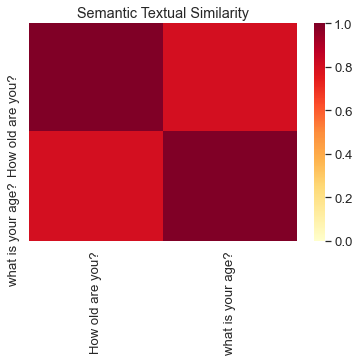

In [64]:
messages = [
#     # Smartphones
#     "I like my phone",
#     "My phone is not good.",
#     "Your cellphone looks great.",

#     # Weather
#     "Will it snow tomorrow?",
#     "Recently a lot of hurricanes have hit the US",
#     "Global warming is real",

#     # Food and health
#     "An apple a day, keeps the doctors away",
#     "Eating strawberries is healthy",
#     "Is paleo better than keto?",

    # Asking about age
    "How old are you?",
    "what is your age?",
]

run_and_plot(messages)
               

## Evaluation: STS (Semantic Textual Similarity) Benchmark

The [**STS Benchmark**](http://ixa2.si.ehu.es/stswiki/index.php/STSbenchmark) provides an intristic evaluation of the degree to which similarity scores computed using sentence embeddings align with human judgements. The benchmark requires systems to return similarity scores for a diverse selection of sentence pairs. [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) is then used to evaluate the quality of the machine similarity scores against human judgements.

### Download data

In [ ]:
import pandas
import scipy
import math
import csv

sts_dataset = tf.keras.utils.get_file(
    fname="Stsbenchmark.tar.gz",
    origin="http://ixa2.si.ehu.es/stswiki/images/4/48/Stsbenchmark.tar.gz",
    extract=True)
sts_dev = pandas.read_table(
    os.path.join(os.path.dirname(sts_dataset), "stsbenchmark", "sts-dev.csv"),
    error_bad_lines=False,
    skip_blank_lines=True,
    usecols=[4, 5, 6],
    names=["sim", "sent_1", "sent_2"])
sts_test = pandas.read_table(
    os.path.join(
        os.path.dirname(sts_dataset), "stsbenchmark", "sts-test.csv"),
    error_bad_lines=False,
    quoting=csv.QUOTE_NONE,
    skip_blank_lines=True,
    usecols=[4, 5, 6],
    names=["sim", "sent_1", "sent_2"])
# cleanup some NaN values in sts_dev
sts_dev = sts_dev[[isinstance(s, str) for s in sts_dev['sent_2']]]

### Evaluate Sentence Embeddings

In [ ]:
sts_data = sts_dev #@param ["sts_dev", "sts_test"] {type:"raw"}

def run_sts_benchmark(batch):
  sts_encode1 = tf.nn.l2_normalize(embed(tf.constant(batch['sent_1'].tolist())), axis=1)
  sts_encode2 = tf.nn.l2_normalize(embed(tf.constant(batch['sent_2'].tolist())), axis=1)
  cosine_similarities = tf.reduce_sum(tf.multiply(sts_encode1, sts_encode2), axis=1)
  clip_cosine_similarities = tf.clip_by_value(cosine_similarities, -1.0, 1.0)
  scores = 1.0 - tf.acos(clip_cosine_similarities) / math.pi
  """Returns the similarity scores"""
  return scores

dev_scores = sts_data['sim'].tolist()
scores = []
for batch in np.array_split(sts_data, 10):
  scores.extend(run_sts_benchmark(batch))

pearson_correlation = scipy.stats.pearsonr(scores, dev_scores)
print('Pearson correlation coefficient = {0}\np-value = {1}'.format(
    pearson_correlation[0], pearson_correlation[1]))